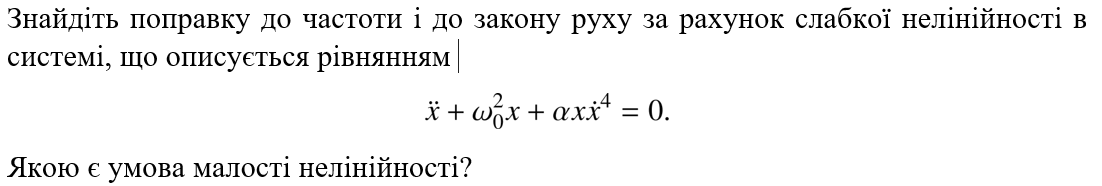

In [1]:
from IPython.display import display, Math, Latex

def disp(ex):
    display(Math(latex(ex)))

def displ(tex):
    display(Math(tex))

In [2]:
# Объявление переменных и функций

t = var("t")

X = var("x")
x = function("x")(t)

x1 = function("x_1")(t)
assume(x1 < x)

x2 = function("x_2")(t)
assume(x2 < x)

omega_0 = var("omega_0")
assume(omega_0, "real")
assume(omega_0>0)


alpha = var("alpha")
assume(alpha, "real")
assume(alpha > 0)

A, phi = var("A, phi")

assume(alpha*A^2 < 1)

In [3]:
# линейная часть исходного дифференциального уравнения
linear = x.diff(t, 2) + omega_0^2 * x
eq0 = linear == 0
disp(eq0)

<IPython.core.display.Math object>

In [4]:
# нелинейная добавка к дифференциальному уравнению
pw = 2 # степень нелинейности
nonlinear = alpha * x * x.diff(t)^pw
disp(nonlinear)

<IPython.core.display.Math object>

In [5]:
# исходное нелинейное дифференциальное уравнение
eq = linear + nonlinear == 0
disp(eq)

<IPython.core.display.Math object>

In [6]:
# пытаемся решить его в лоб
sol = desolve(eq, x, ivar=t)
#disp(sol)

In [7]:
disp(sol[0].substitute_function(x == X))

<IPython.core.display.Math object>

In [8]:
disp(sol[1].substitute_function(x == X))

<IPython.core.display.Math object>

In [9]:
# нулевое приближение решения
# это по сути решение линейной части исходного дифференциального уравнения
x_0 = desolve(eq0, x, ivar=t)
disp(x_0)

<IPython.core.display.Math object>

In [10]:
# нулевое приближение удобнее выбрать
# в виде косинуса от omega_0*t
# с неким сдвигом фаз phi
x0 = A * cos(omega_0*t + phi)
disp(x0)

<IPython.core.display.Math object>

In [11]:
# метод последовательных приближений
# вводим добавку x1 к нулевому приближению решения,
# и подставляем это решение
# с добавкой лишь к линейной части дифференциального уравнения
# но в нелинейной части пока что пренебегаем добавкой x1
# предположив малость величины добавки x1 по сравнению с x0
eq1 = linear.substitute_function(x == x0 + x1) \
     + nonlinear.substitute_function(x == x0) \
     == 0
disp(eq1)

<IPython.core.display.Math object>

In [12]:
# преобразовываем упрощая полученное новое дифференциальное уравнение
eq1 = eq1.expand()
disp(eq1)

<IPython.core.display.Math object>

In [13]:
# понижаем в этом дифференциальном уравнении
# степень тригонометрических выражений
# за счёт увеличения кратности
# тригонометрических аргументов
eq1 = eq1.trig_reduce()
disp(eq1)

<IPython.core.display.Math object>

In [14]:
# решаем это дифференциальное уравнение относительно x1
sol1 = desolve(eq1, x1, ivar=t)
disp(sol1)

<IPython.core.display.Math object>

In [15]:
# подставляя полученное решение
# в дифференциальное уравнение
# проверяем правильность решения
test_sol1 = eq1.substitute_function(x1 == sol1).expand().trig_reduce()
test_sol1

0 == 0

In [16]:
# отнимаем от полученного решения
# два правых слагаемых
# потому что они повторяют решение
# нулевого приближения x0
sol_1_ = sum(sol1.operands()[:-2])
disp(sol_1_)

<IPython.core.display.Math object>

In [17]:
# подставляя полученное решение
# первого приближения
# в дифференциальное уравнение
# проверяем правильность решения
test_eq1 = eq1.substitute_function(x1 == sol_1_).expand()
test_eq1

0 == 0

In [18]:
# решение суммирующее нулевое и первое приближения
sol_1 = sol_1_ + x0
disp(sol_1)

<IPython.core.display.Math object>

In [19]:
# подставляя полученное решение
# нулевого и первого приближения в сумме
# в дифференциальное уравнение
# проверяем правильность решения
test_eq1 = eq1.substitute_function(x1 == sol_1).expand()
test_eq1

0 == 0

In [20]:
values = [
    phi == 0,
    omega_0 == 1, alpha == 0.1,
    A == 1,
]
values

[phi == 0, omega_0 == 1, alpha == 0.100000000000000, A == 1]

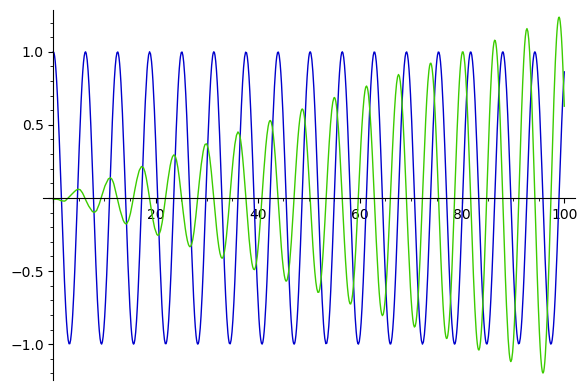

In [21]:
# анализируя графики нулевого и первого приближения
# приходим к выводу, что нужно убрать из решение
# резонансное слагаемое явно зависящее от времени
plot([x0.subs(values), (sol_1_).subs(values)], (t, 0, 100))

In [22]:
# а чтобы убрать из решения
# резонансное слагаемое явно
# нужно в дифференциальном уравнении 
disp(eq1)

<IPython.core.display.Math object>

In [23]:
# сделать обратную замену слагаемого
# имеющего ту же частоту, что и
# частота нулевого приближения

eq1_x1_lhs = 0
subs_from = cos(omega_0*t + phi)
subs_to = x1/A

for m in eq1.lhs().operands():
    if m.has(subs_from):
        m = m / subs_from * subs_to
        
    eq1_x1_lhs += m

eq1_x1 = eq1_x1_lhs == 0
disp(eq1_x1)

<IPython.core.display.Math object>

In [24]:
# решая дифференциальное уравнение после обратной замены
# получаем решение со смещённой частотой
sol1_x1 = desolve(eq1_x1, x1, ivar=t)
disp(sol1_x1)

<IPython.core.display.Math object>

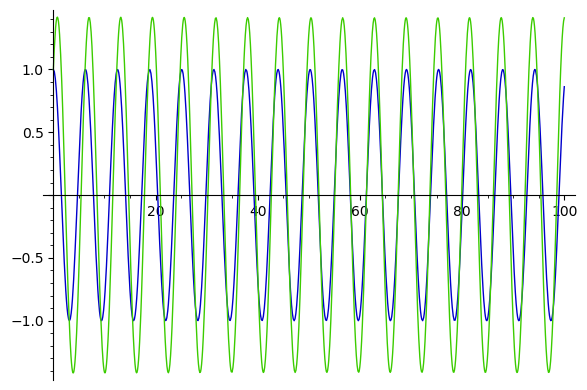

In [25]:
plot([x0.subs(values), (sol1_x1).subs([values, var("_K1") == 1, var("_K2") == 1])], (t, 0, 100))

In [26]:
# метод последовательных приближений
# ищем второе приближение x2
# в нелинейной части пренебегаем добавкой x2
# ввиду его малости по сравнению с x0 + x1
eq2 = linear.substitute_function(x == x0 + sol1_x1 + x2) \
     + nonlinear.substitute_function(x == x0 + sol1_x1) \
     == 0
#disp(eq2)

In [27]:
eq2 = eq2.expand()
#disp(eq2)
for operand in eq2.operands()[0].operands():
    disp(operand)
    print("")

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [28]:
eq2 = eq2.trig_reduce().expand()
#disp(eq2)
for operand in eq2.operands()[0].operands():
    disp(operand)
    print("")

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [29]:
sol2 = desolve(eq2, x2, ivar=t)
#disp(sol2)
sol2

TypeError: ECL says: THROW: The catch RAT-ERR is undefined.